<a href="https://colab.research.google.com/github/iammartian0/Audio101/blob/main/Working_with_dataset/Working_with_audio_data_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing Hugging face space datasets library

In [ ]:
!pip install datasets[audio]

Exploring German Audio Files

In [34]:
from datasets import load_dataset

minds = load_dataset("PolyAI/minds14", name="de-DE", split="train")
minds

Generating train split: 0 examples [00:00, ? examples/s]

Dataset minds14 downloaded and prepared to /root/.cache/huggingface/datasets/PolyAI___minds14/de-DE/1.0.0/65c7e0f3be79e18a6ffaf879a083daf706312d421ac90d25718459cbf3c42696. Subsequent calls will reuse this data.


Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 611
})

In [35]:
minds[0]

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/de-DE~CASH_DEPOSIT/response_4.wav',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/de-DE~CASH_DEPOSIT/response_4.wav',
  'array': array([0.        , 0.        , 0.        , ..., 0.00598145, 0.0045166 ,
         0.00268555]),
  'sampling_rate': 8000},
 'transcription': 'ich möchte gerne Geld auf mein Konto einzahlen',
 'english_transcription': 'I would like to deposit money into my account',
 'intent_class': 7,
 'lang_id': 1}

In [36]:
minds[1]

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/de-DE~CASH_DEPOSIT/response_17.wav',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/de-DE~CASH_DEPOSIT/response_17.wav',
  'array': array([0., 0., 0., ..., 0., 0., 0.]),
  'sampling_rate': 8000},
 'transcription': 'Hallo ich möchte fragen ob ich Geld auf mein Konto einzahlen kann oder halt wie kann ich das genau machen ich will Bargeld auf mein Konto einzahlen weil ich kann auch von einem Konto auf ein anderes Konto Geld überweisen',
 'english_transcription': 'Hello I would like to ask if I can deposit money into my account or how can I do that exactly? I want to deposit cash into my account because I can also transfer money from one account to another',
 'intent_class': 7,
 'lang_id': 1}

In [37]:
id2label = minds.features["intent_class"].int2str
for i in range(10):
  print(id2label(i))

abroad
address
app_error
atm_limit
balance
business_loan
card_issues
cash_deposit
direct_debit
freeze


In [38]:
id2label(7)

'cash_deposit'

In [39]:
columns_to_remove = ["lang_id"]
minds = minds.remove_columns(columns_to_remove)
minds

Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class'],
    num_rows: 611
})

In [ ]:
!pip install gradio

In [40]:
import gradio as gr


def generate_audio():
    example = minds.shuffle()[0]
    audio = example["audio"]
    return (
        audio["sampling_rate"],
        audio["array"],
    ), id2label(example["intent_class"])


with gr.Blocks() as demo:
    with gr.Column():
        for _ in range(4):
            audio, label = generate_audio()
            output = gr.Audio(audio, label=label)

demo.launch(debug=True,share=True)

/usr/local/lib/python3.10/dist-packages/gradio/processing_utils.py:171: UserWarning: Trying to convert audio automatically from float64 to 16-bit int format.
  warnings.warn(warning.format(data.dtype))


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://4b169f4bb2dfc6d725.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://4b169f4bb2dfc6d725.gradio.live


In [41]:
example=minds[3]

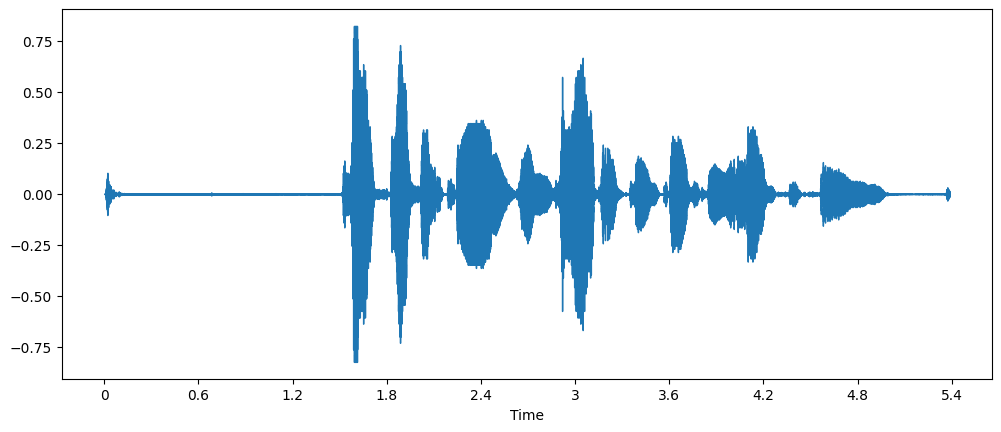

In [42]:
import librosa
import matplotlib.pyplot as plt
import librosa.display

array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)